In [ ]:
!pip install transformers sentencepiece datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 33.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


# load the pretrained model

In [ ]:
from datasets import load_dataset
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
# Use 'google/mt5-small'
model_repo = 'google/mt5-small'
max_seq_len = 20
model.config.max_length

20

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Model description: https://huggingface.co/google/mt5-small
model = AutoModelForSeq2SeqLM.from_pretrained('google/mt5-small')


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# Test the tokenizer

In [ ]:
input_str='<Ja> testing the nlp task'# this english text line we want to translate it to japanese language for example <Ja>
input_ids=tokenizer.encode(input_str)
print(input_ids)
tokens=tokenizer.convert_ids_to_tokens(input_ids)
print("tokens are ",tokens )

[1042, 9643, 669, 259, 46542, 287, 259, 272, 280, 325, 41401, 1]
tokens are  ['▁<', 'Ja', '>', '▁', 'testing', '▁the', '▁', 'n', 'l', 'p', '▁task', '</s>']


In [ ]:
tokenizer.vocab

{'терапии': 135488,
 '▁பார்த்த': 43721,
 'ாகக்': 165871,
 '▁undervis': 187008,
 'rmi': 74924,
 '단양': 134757,
 '1660': 131114,
 'గ్ల': 170019,
 'տրի': 172152,
 'お会い': 224472,
 '665': 52753,
 'rildi': 155371,
 '▁социал': 39859,
 '▁հրա': 43595,
 'กว้าง': 113965,
 'птер': 96159,
 'עצי': 124258,
 '▁fiske': 73790,
 'Подар': 139699,
 '▁153': 23588,
 'প্রতিষ্ঠা': 62782,
 'elekile': 201254,
 'Serge': 234874,
 'TBC': 130404,
 'を紹介しています': 230196,
 'ЗАР': 210225,
 'μπλο': 193317,
 'lieta': 86761,
 'JÕÀ': 153146,
 'дат': 8371,
 'povesti': 177993,
 '娼': 240819,
 'AIP': 197153,
 '464': 77771,
 'ASU': 159563,
 'рување': 228580,
 '32%': 109602,
 '▁grá': 61669,
 'partiment': 129361,
 'іктің': 193740,
 'ርት': 22953,
 'Evil': 90395,
 'эмж': 169586,
 'ருடன்': 204290,
 '➲': 246014,
 'gtar': 189923,
 '.143': 94127,
 'PST': 53134,
 'それなりに': 188226,
 'иясы': 123272,
 '▁Repe': 127757,
 '▁Berger': 118120,
 '8025': 198575,
 'variants': 37706,
 'ಹ': 10481,
 'TZ': 27223,
 'stava': 41943,
 'जिल': 190467,
 '▁folytat':

# ***Load*** the Dataset

In [ ]:
# Source: https://huggingface.co/datasets/alt
dataset=load_dataset('alt') # it supports 13 languages

Generating train split:   0%|          | 0/18088 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [ ]:
train_dataset=dataset['train']
test_dataset=dataset['test']

In [ ]:
train_dataset  #num of rows =18088

Dataset({
    features: ['SNT.URLID', 'SNT.URLID.SNTID', 'url', 'translation'],
    num_rows: 18088
})

In [ ]:
test_dataset  #num of rows =1019

Dataset({
    features: ['SNT.URLID', 'SNT.URLID.SNTID', 'url', 'translation'],
    num_rows: 1019
})

In [ ]:
# let's see the first example in the training dataset
train_dataset[0]

{'SNT.URLID': '80188',
 'SNT.URLID.SNTID': '1',
 'url': 'http://en.wikinews.org/wiki/2007_Rugby_World_Cup:_Italy_31_-_5_Portugal',
 'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।',
  'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.',
  'en_tok': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes , Paris , France .',
  'fil': 'Natalo ng Italya ang Portugal sa puntos na 31-5 sa Grupong C noong 2007 sa Pandaigdigang laro ng Ragbi sa Parc des Princes, Paris, France.',
  'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।',
  'id': 'Italia berhasil mengalahkan Portugal 31-5 di grup C dalam Piala Dunia Rugby 2007 di Parc des Princes, Paris, Perancis.',
  'ja': 'フランスのパリ、パルク・デ・プランスで行われた2007年ラグビーワールドカップのプールCで、イタリアは31対5でポルトガルを

In [ ]:
tokenizer.vocab['en']


278

In [ ]:
# now we want to map the this expression 'en' to this <en> putting it in tags and then adding them in the tokenizer as you see the <en>,<ja>.. is not exist in it
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'ja': '<jp>',
    'zh': '<ch>'

}

In [ ]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))




Embedding(250103, 512)

In [ ]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]
  # Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]




def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return token_ids[0]



def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    if formatted_data is None:
      continue

    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [ ]:
# Testing `data_transform`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

<ch> ▁Italy ▁have ▁de feat ed ▁Portugal ▁3 1-5 ▁in ▁Pool ▁C ▁of ▁the ▁2007 ▁ Rugby ▁World ▁Cup ▁at ▁Parc ▁des ▁Princes , ▁Paris , ▁France . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁ 意大利 在 法国 巴黎 王子 公园 体育 场 举办 的 2007 年 橄 榄 球 世界杯 C 组 以 3 1-5 击 败 葡萄 牙 。 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

# Train/Finetune BERT

In [ ]:
n_epochs = 8
batch_size = 16
print_freq = 50
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [ ]:
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
losses = []

In [ ]:

def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)



In [ ]:
model.to("cuda:0")
input_batch = input_batch.to("cuda:0")
label_batch = label_batch.to("cuda:0")


In [ ]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))
    test_loss = eval_model(model, test_dataset)
    print('model test loss {:.3f}'.format(test_loss))

<ipython-input-29-af7359d022ce>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 3.700 | lr: 0.00047839919624916277
Epoch: 1 | Step: 100 | Avg. loss: 3.575 | lr: 0.00047560839473096675
Epoch: 1 | Step: 150 | Avg. loss: 3.572 | lr: 0.00047281759321277073
Epoch: 1 | Step: 200 | Avg. loss: 3.530 | lr: 0.00047002679169457466
Epoch: 1 | Step: 250 | Avg. loss: 3.480 | lr: 0.0004672359901763787
Epoch: 1 | Step: 300 | Avg. loss: 3.418 | lr: 0.0004644451886581826
Epoch: 1 | Step: 350 | Avg. loss: 3.320 | lr: 0.0004616543871399866
Epoch: 1 | Step: 400 | Avg. loss: 3.310 | lr: 0.0004588635856217906
Epoch: 1 | Step: 450 | Avg. loss: 3.361 | lr: 0.0004560727841035945
Epoch: 1 | Step: 500 | Avg. loss: 3.280 | lr: 0.00045328198258539856
Epoch: 1 | Step: 550 | Avg. loss: 3.326 | lr: 0.0004504911810672025
Epoch: 1 | Step: 600 | Avg. loss: 3.268 | lr: 0.0004477003795490065
Epoch: 1 | Step: 650 | Avg. loss: 3.288 | lr: 0.00044490957803081045
Epoch: 1 | Step: 700 | Avg. loss: 3.243 | lr: 0.00044211877651261443
Epoch: 1 | Step: 750 | Avg. loss: 3.225 | 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 3.032 | lr: 0.00041527126590756863
Epoch: 2 | Step: 100 | Avg. loss: 3.022 | lr: 0.00041248046438937267
Epoch: 2 | Step: 150 | Avg. loss: 2.982 | lr: 0.0004096896628711766
Epoch: 2 | Step: 200 | Avg. loss: 2.988 | lr: 0.0004068988613529806
Epoch: 2 | Step: 250 | Avg. loss: 2.975 | lr: 0.00040410805983478456
Epoch: 2 | Step: 300 | Avg. loss: 2.891 | lr: 0.00040131725831658854
Epoch: 2 | Step: 350 | Avg. loss: 3.012 | lr: 0.00039852645679839253
Epoch: 2 | Step: 400 | Avg. loss: 3.009 | lr: 0.0003957356552801965
Epoch: 2 | Step: 450 | Avg. loss: 2.993 | lr: 0.00039294485376200044
Epoch: 2 | Step: 500 | Avg. loss: 2.982 | lr: 0.0003901540522438044
Epoch: 2 | Step: 550 | Avg. loss: 2.951 | lr: 0.0003873632507256084
Epoch: 2 | Step: 600 | Avg. loss: 2.878 | lr: 0.00038457244920741233
Epoch: 2 | Step: 650 | Avg. loss: 2.933 | lr: 0.00038178164768921637
Epoch: 2 | Step: 700 | Avg. loss: 2.891 | lr: 0.0003789908461710203
Epoch: 2 | Step: 750 | Avg. loss: 2.919 |

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 2.710 | lr: 0.00035214333556597455
Epoch: 3 | Step: 100 | Avg. loss: 2.747 | lr: 0.0003493525340477785
Epoch: 3 | Step: 150 | Avg. loss: 2.773 | lr: 0.0003465617325295825
Epoch: 3 | Step: 200 | Avg. loss: 2.758 | lr: 0.00034377093101138644
Epoch: 3 | Step: 250 | Avg. loss: 2.762 | lr: 0.0003409801294931905
Epoch: 3 | Step: 300 | Avg. loss: 2.714 | lr: 0.0003381893279749944
Epoch: 3 | Step: 350 | Avg. loss: 2.743 | lr: 0.0003353985264567984
Epoch: 3 | Step: 400 | Avg. loss: 2.741 | lr: 0.0003326077249386024
Epoch: 3 | Step: 450 | Avg. loss: 2.746 | lr: 0.00032981692342040636
Epoch: 3 | Step: 500 | Avg. loss: 2.763 | lr: 0.00032702612190221034
Epoch: 3 | Step: 550 | Avg. loss: 2.742 | lr: 0.0003242353203840143
Epoch: 3 | Step: 600 | Avg. loss: 2.740 | lr: 0.00032144451886581825
Epoch: 3 | Step: 650 | Avg. loss: 2.736 | lr: 0.00031865371734762223
Epoch: 3 | Step: 700 | Avg. loss: 2.672 | lr: 0.0003158629158294262
Epoch: 3 | Step: 750 | Avg. loss: 2.714 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 2.554 | lr: 0.00028901540522438047
Epoch: 4 | Step: 100 | Avg. loss: 2.578 | lr: 0.0002862246037061844
Epoch: 4 | Step: 150 | Avg. loss: 2.609 | lr: 0.00028343380218798843
Epoch: 4 | Step: 200 | Avg. loss: 2.630 | lr: 0.00028064300066979236
Epoch: 4 | Step: 250 | Avg. loss: 2.584 | lr: 0.0002778521991515963
Epoch: 4 | Step: 300 | Avg. loss: 2.556 | lr: 0.00027506139763340033
Epoch: 4 | Step: 350 | Avg. loss: 2.557 | lr: 0.00027227059611520426
Epoch: 4 | Step: 400 | Avg. loss: 2.549 | lr: 0.0002694797945970083
Epoch: 4 | Step: 450 | Avg. loss: 2.508 | lr: 0.0002666889930788122
Epoch: 4 | Step: 500 | Avg. loss: 2.582 | lr: 0.0002638981915606162
Epoch: 4 | Step: 550 | Avg. loss: 2.615 | lr: 0.0002611073900424202
Epoch: 4 | Step: 600 | Avg. loss: 2.573 | lr: 0.00025831658852422417
Epoch: 4 | Step: 650 | Avg. loss: 2.569 | lr: 0.00025552578700602815
Epoch: 4 | Step: 700 | Avg. loss: 2.587 | lr: 0.00025273498548783214
Epoch: 4 | Step: 750 | Avg. loss: 2.592 |

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 2.467 | lr: 0.00022588747488278636
Epoch: 5 | Step: 100 | Avg. loss: 2.429 | lr: 0.0002230966733645903
Epoch: 5 | Step: 150 | Avg. loss: 2.498 | lr: 0.00022030587184639427
Epoch: 5 | Step: 200 | Avg. loss: 2.438 | lr: 0.00021751507032819826
Epoch: 5 | Step: 250 | Avg. loss: 2.379 | lr: 0.00021472426881000224
Epoch: 5 | Step: 300 | Avg. loss: 2.445 | lr: 0.00021193346729180622
Epoch: 5 | Step: 350 | Avg. loss: 2.396 | lr: 0.00020914266577361018
Epoch: 5 | Step: 400 | Avg. loss: 2.430 | lr: 0.00020635186425541416
Epoch: 5 | Step: 450 | Avg. loss: 2.434 | lr: 0.00020356106273721814
Epoch: 5 | Step: 500 | Avg. loss: 2.388 | lr: 0.00020077026121902212
Epoch: 5 | Step: 550 | Avg. loss: 2.414 | lr: 0.00019797945970082608
Epoch: 5 | Step: 600 | Avg. loss: 2.414 | lr: 0.00019518865818263006
Epoch: 5 | Step: 650 | Avg. loss: 2.416 | lr: 0.00019239785666443402
Epoch: 5 | Step: 700 | Avg. loss: 2.444 | lr: 0.000189607055146238
Epoch: 5 | Step: 750 | Avg. loss: 2.42

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 6 | Step: 50 | Avg. loss: 2.283 | lr: 0.00016275954454119223
Epoch: 6 | Step: 100 | Avg. loss: 2.310 | lr: 0.0001599687430229962
Epoch: 6 | Step: 150 | Avg. loss: 2.335 | lr: 0.0001571779415048002
Epoch: 6 | Step: 200 | Avg. loss: 2.314 | lr: 0.00015438713998660417
Epoch: 6 | Step: 250 | Avg. loss: 2.312 | lr: 0.00015159633846840813
Epoch: 6 | Step: 300 | Avg. loss: 2.341 | lr: 0.00014880553695021209
Epoch: 6 | Step: 350 | Avg. loss: 2.317 | lr: 0.00014601473543201607
Epoch: 6 | Step: 400 | Avg. loss: 2.265 | lr: 0.00014322393391382005
Epoch: 6 | Step: 450 | Avg. loss: 2.292 | lr: 0.00014043313239562403
Epoch: 6 | Step: 500 | Avg. loss: 2.384 | lr: 0.000137642330877428
Epoch: 6 | Step: 550 | Avg. loss: 2.352 | lr: 0.00013485152935923197
Epoch: 6 | Step: 600 | Avg. loss: 2.316 | lr: 0.00013206072784103596
Epoch: 6 | Step: 650 | Avg. loss: 2.315 | lr: 0.00012926992632283994
Epoch: 6 | Step: 700 | Avg. loss: 2.273 | lr: 0.00012647912480464392
Epoch: 6 | Step: 750 | Avg. loss: 2.271

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 7 | Step: 50 | Avg. loss: 2.253 | lr: 9.963161419959813e-05
Epoch: 7 | Step: 100 | Avg. loss: 2.224 | lr: 9.68408126814021e-05
Epoch: 7 | Step: 150 | Avg. loss: 2.195 | lr: 9.405001116320608e-05
Epoch: 7 | Step: 200 | Avg. loss: 2.238 | lr: 9.125920964501005e-05
Epoch: 7 | Step: 250 | Avg. loss: 2.190 | lr: 8.846840812681402e-05
Epoch: 7 | Step: 300 | Avg. loss: 2.185 | lr: 8.567760660861799e-05
Epoch: 7 | Step: 350 | Avg. loss: 2.239 | lr: 8.288680509042197e-05
Epoch: 7 | Step: 400 | Avg. loss: 2.229 | lr: 8.009600357222594e-05
Epoch: 7 | Step: 450 | Avg. loss: 2.187 | lr: 7.730520205402993e-05
Epoch: 7 | Step: 500 | Avg. loss: 2.174 | lr: 7.451440053583388e-05
Epoch: 7 | Step: 550 | Avg. loss: 2.278 | lr: 7.172359901763786e-05
Epoch: 7 | Step: 600 | Avg. loss: 2.169 | lr: 6.893279749944183e-05
Epoch: 7 | Step: 650 | Avg. loss: 2.264 | lr: 6.614199598124582e-05
Epoch: 7 | Step: 700 | Avg. loss: 2.159 | lr: 6.33511944630498e-05
Epoch: 7 | Step: 750 | Avg. loss: 2.178 | lr: 6.056

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 8 | Step: 50 | Avg. loss: 2.147 | lr: 3.650368385800402e-05
Epoch: 8 | Step: 100 | Avg. loss: 2.065 | lr: 3.371288233980799e-05
Epoch: 8 | Step: 150 | Avg. loss: 2.119 | lr: 3.092208082161197e-05
Epoch: 8 | Step: 200 | Avg. loss: 2.112 | lr: 2.8131279303415942e-05
Epoch: 8 | Step: 250 | Avg. loss: 2.111 | lr: 2.5340477785219914e-05
Epoch: 8 | Step: 300 | Avg. loss: 2.104 | lr: 2.254967626702389e-05
Epoch: 8 | Step: 350 | Avg. loss: 2.065 | lr: 1.9758874748827863e-05
Epoch: 8 | Step: 400 | Avg. loss: 2.045 | lr: 1.6968073230631836e-05
Epoch: 8 | Step: 450 | Avg. loss: 2.139 | lr: 1.4177271712435812e-05
Epoch: 8 | Step: 500 | Avg. loss: 2.172 | lr: 1.1386470194239786e-05
Epoch: 8 | Step: 550 | Avg. loss: 2.133 | lr: 8.59566867604376e-06
Epoch: 8 | Step: 600 | Avg. loss: 2.110 | lr: 5.804867157847734e-06
Epoch: 8 | Step: 650 | Avg. loss: 2.150 | lr: 3.014065639651708e-06
Epoch: 8 | Step: 700 | Avg. loss: 2.131 | lr: 2.232641214556821e-07
Epoch: 8 | Step: 750 | Avg. loss: 2.106 | lr

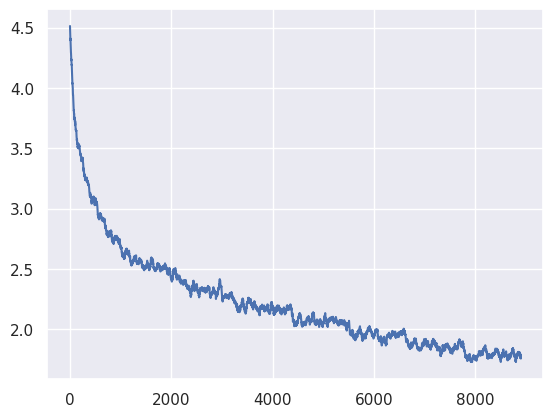

In [ ]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

In [ ]:
test_sentence = test_dataset[0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'hi',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: It has been confirmed that eight thoroughbred race horses at Randwick Racecourse in Sydney have been infected with equine influenza.
Truncated input text: <hn> It has been confirmed that eight thoroughbred race horses at Randwick Racecourse</s>


In [ ]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


यह पुष्टि हुई है कि रविवार को रेस के दौरान 
यह पुष्टि हुई है कि रविवार को स्थानीय समयानुसार रवि
यह पुष्टि हुई है कि रविवार को रविवार को स्थानीय 


In [ ]:
#@title Slick Blue Translate
input_text = ' वर्तमान में यह एक सर्वश्रेष्ठ परीक्षण है, जिसमें' #@param {type:"string"}
output_language = "hi" # @param ["en", "hi", "vi"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))